**SEASONAL BIKE RENTAL ANALYSIS**

**Business Problem:**
This project aims to optimize bike rental operations in Seoul by leveraging data-driven insights. By analyzing various factors affecting bike rentals, we can improve resource allocation, enhance user experience, and potentially increase revenue for the bike rental service.

**Project Objectives:**
* Identify and quantify the top 3-5 factors influencing bike rental demand in Seoul, providing actionable insights for operational decision-making.
* Develop a regression model to predict hourly bike rental demand with at least 85% accuracy.
* Design and deploy an interactive web application using Streamlit, allowing users to test the regression model through an intuitive interface.

# **DATA PREPROCESSING**

## DATASET LOAD

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
org_data = pd.read_csv('SeoulBikeData.csv', encoding='Windows-1252')
data = org_data

## DATASET INSPECTION

### ***Basic Cleaning***

In [3]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [5]:
#Remove redundant dependent feature through excel inspection
data = data.drop(columns=['Functioning Day'])

#Making the dependent column as the last column
dependent_column = data.pop('Rented Bike Count')
data['Rented Bike Count'] = dependent_column
data.head()

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Rented Bike Count
0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,254
1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,204
2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,173
3,01/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,107
4,01/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,78


In [6]:
# Combine the Date and Hour columns into a single datetime column
data['datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Hour'].astype(str) + ':00', format='%d/%m/%Y %H:%M')

# Set the datetime column as the index
data.set_index('datetime', inplace=True)

# Drop the original Date and Hour columns as they are now redundant
data.drop(columns=['Date', 'Hour'], inplace=True)
data.head()


,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Rented Bike Count
datetime,,,,,,,,,,,
2017-12-01 00:00:00,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,254
2017-12-01 01:00:00,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,204
2017-12-01 02:00:00,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,173
2017-12-01 03:00:00,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,107
2017-12-01 04:00:00,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,78


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2017-12-01 00:00:00 to 2018-11-30 23:00:00
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Temperature(°C)            8760 non-null   float64
 1   Humidity(%)                8760 non-null   int64  
 2   Wind speed (m/s)           8760 non-null   float64
 3   Visibility (10m)           8760 non-null   int64  
 4   Dew point temperature(°C)  8760 non-null   float64
 5   Solar Radiation (MJ/m2)    8760 non-null   float64
 6   Rainfall(mm)               8760 non-null   float64
 7   Snowfall (cm)              8760 non-null   float64
 8   Seasons                    8760 non-null   object 
 9   Holiday                    8760 non-null   object 
 10  Rented Bike Count          8760 non-null   int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 821.2+ KB


### ***Feature Split***

In [8]:
#Split the features for exploration
numerical_features = list(data.select_dtypes(include=['int64', 'float64']).columns)
#Exclude the target feature
numerical_features = numerical_features[:-1]
categorical_features = ['Seasons', 'Holiday']
target_feature = ['Rented Bike Count']
#REMEMBER - We have the time series as the index and will explore it at the end

### ***Missing Values and Duplicates***

In [9]:
#Check for missing values
missing_values = data.isnull().sum()
missing_values

,0
Temperature(°C),0
Humidity(%),0
Wind speed (m/s),0
Visibility (10m),0
Dew point temperature(°C),0
Solar Radiation (MJ/m2),0
Rainfall(mm),0
Snowfall (cm),0
Seasons,0
Holiday,0


There are no missing values in the dataset

In [10]:
#Check for duplicate values
duplicate_values = data.duplicated().sum()
duplicate_values

0

*KEY OBSERVATIONS*
* There are no missing or duplicate values in the dataset

## TARGET FEATURE ANALYSIS

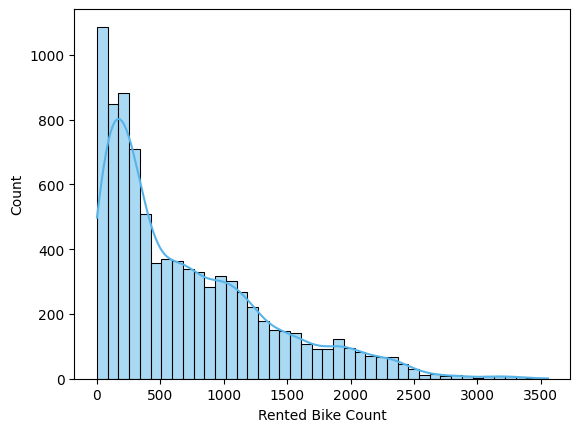

In [11]:
# Create the histogram for the target feature
sns.histplot(data[target_feature[0]], color='#56B4E9', kde=True)
plt.show()

## NUMERICAL FEATURE ANALYSIS

### ***Statistical Summary***

In [12]:
data.describe(include='all')

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Rented Bike Count
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,NaN
mean,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,704.602055
std,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,644.997468
min,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
25%,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,191.000000
50%,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,504.500000
75%,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,1065.250000


In [13]:
#Find the mode/frequent value
most_frequent_values = data.mode().iloc[0]
frequencies = data.apply(lambda x: x.value_counts().iloc[0])

# Combine the results into a DataFrame
results = pd.DataFrame({
    'Most Frequent Value': most_frequent_values,
    'Frequency': frequencies
})

results.T

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Rented Bike Count
Most Frequent Value,19.1,53,1.1,2000.0,0.0,0.0,0.0,0.0,Spring,No Holiday,0.0
Frequency,40,173,420,2245,60,4300,8232,8317,2208,8328,295


### ***Uni-variate Analysis***

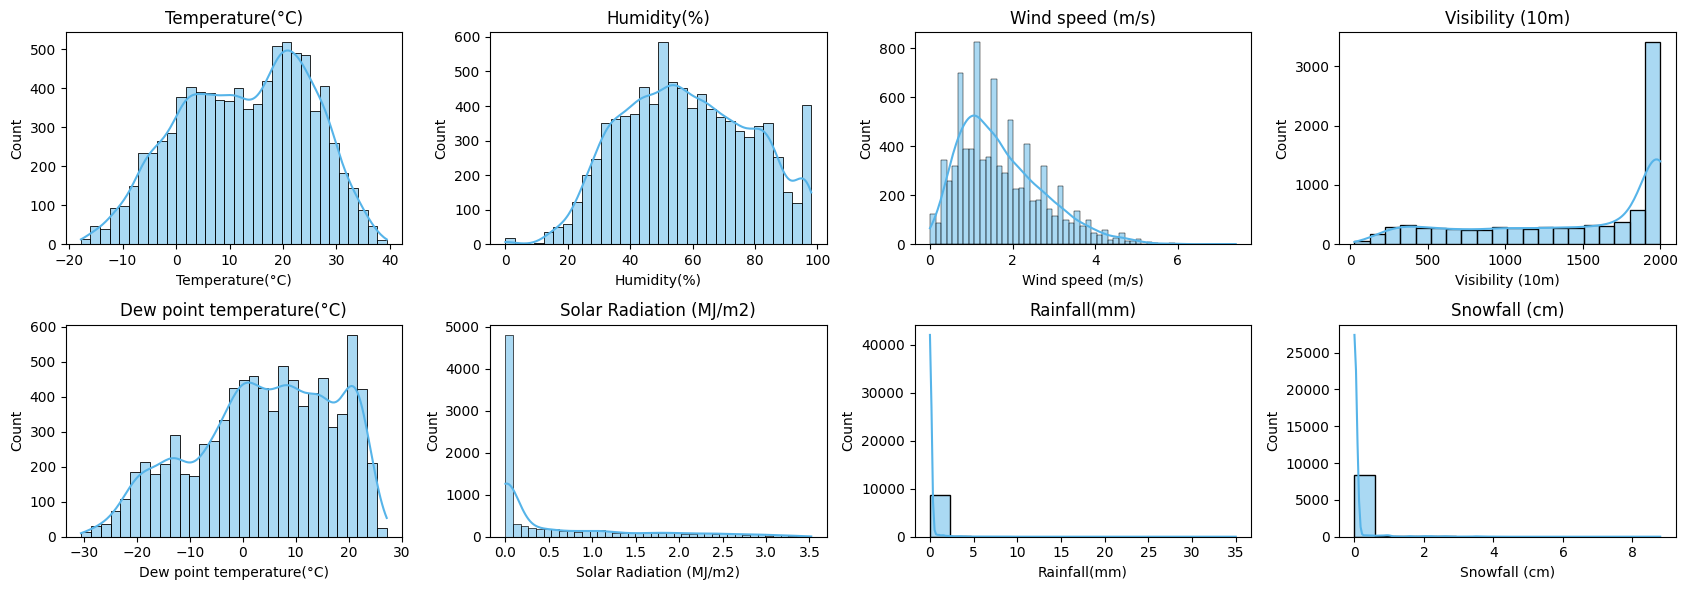

In [14]:
# Initialize the figure
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(17, 6))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate through numerical features and plot histogram and boxplot
for i, feature in enumerate(numerical_features):
    sns.histplot(data[feature], ax=axes[i], color='#56B4E9', kde=True)
    axes[i].set_title(f'{feature}')

plt.tight_layout()
plt.show()

*KEY OBSERVATIONS*

Most of the days observed were:
* Lower Wind Speeds
* High Visibility
* Low Solar Radiation
* Low Rainfall and Snowfall



### ***Bi-variate Analysis***

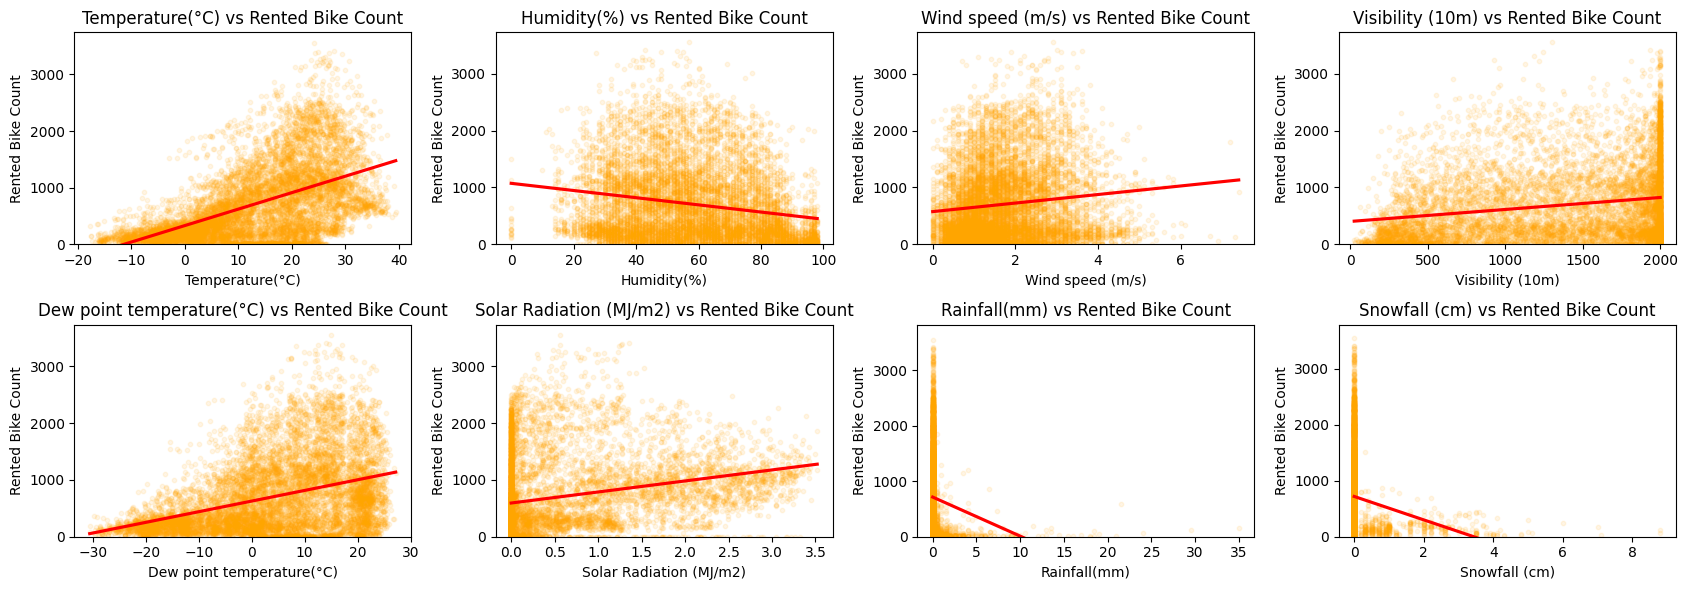

In [15]:
# Initialize the figure
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(17, 6))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate through numerical features and plot scatterplots
for i, feature in enumerate(numerical_features):
        #Regplot creates a scatter plot and fits a regression line to the data. There won't be any data leakage as regplot calculates and plots a simple linear regression line for the sake of visualization without fitting the model
        sns.regplot(x=data[feature], y=data[target_feature[0]], ax=axes[i],ci=None, line_kws={"color":"red"}, scatter_kws={"color": "orange", "marker": "x", "s": 10, "alpha": 0.1})
        axes[i].set_title(f'{feature} vs {target_feature[0]}')
        axes[i].set_ylim(bottom=0)

plt.tight_layout()
plt.show()

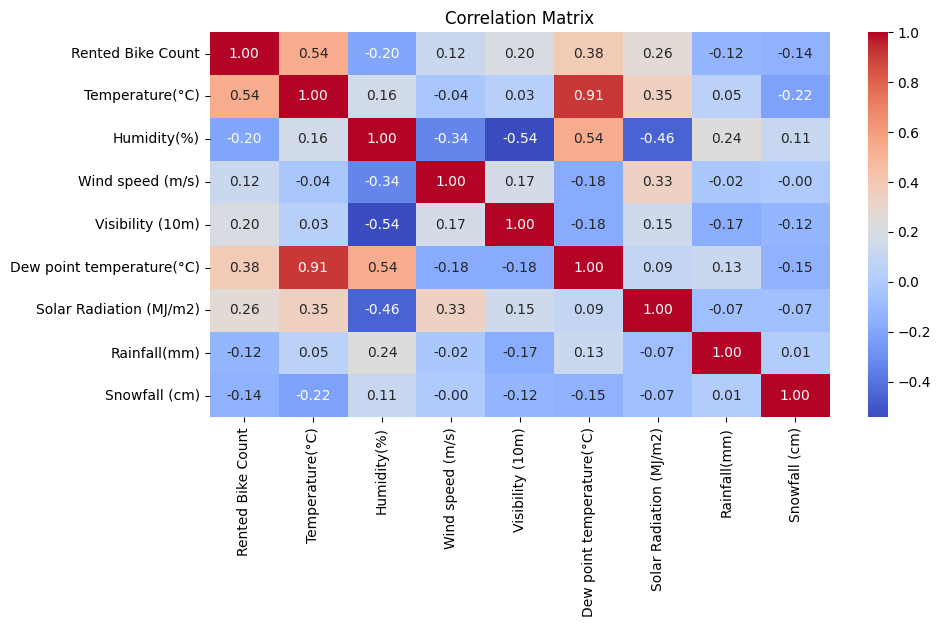

In [16]:
# Add target feature to the list of features for correlation matrix
numerical_target_features = target_feature.copy()
numerical_target_features.extend(numerical_features)

# Compute the correlation matrix
corr_matrix = data[numerical_target_features].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

*KEY OBSERVATIONS*

* Increasing Temperature, Dew and Visibility seem to have the most positive influence on bike rentals
* High rainfall and snowfall seem to have the most negative influence on bike rentals, though they are weakly correlated
* Temperature and Dew: Strong positive correlation, do we need both the variables?
* Humidity and Dew VS Humidity and Temperature: Humidity is moderately correlated with Dew compared to a weak correlation with Temperature. So, this may indicate it might be wise not to drop either Temperature or Dew at this point
* Humidity and Visibility: Moderate negative correlation, indicating that higher humidity often coincides with lower visibility
* Humidity doesn't seem to influence Bike rental drastically as it follows almost a normal distribution with a weak negative correlation




## CATEGORICAL FEATURE ANALYSIS

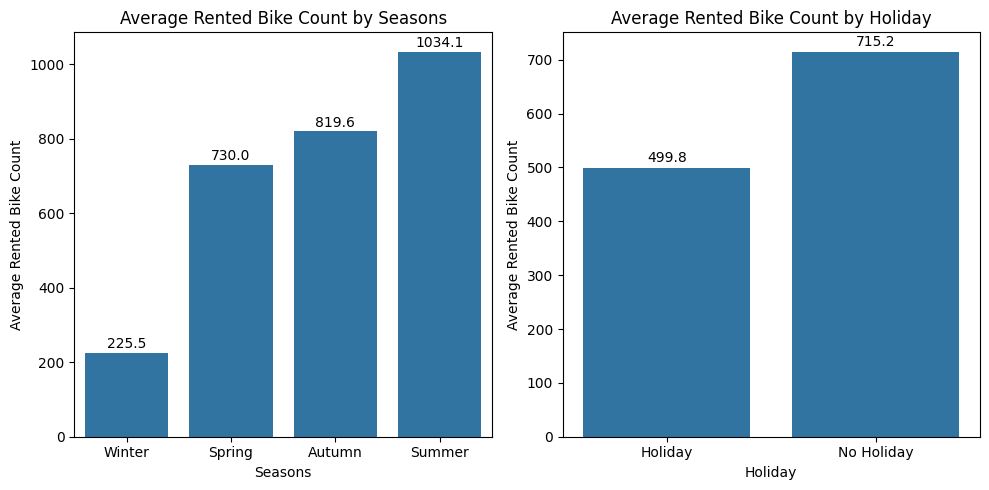

In [17]:
# Initialize the figure with 2 subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Iterate through categorical features and plot on each subplot
for i, feature in enumerate(categorical_features):
    # Calculate the average rented bike count per category
    avg_rented_bike_count = data.groupby(feature)['Rented Bike Count'].mean().sort_values()

    # Create a bar plot on the respective axis
    sns.barplot(ax=axes[i], x=avg_rented_bike_count.index, y=avg_rented_bike_count.values)

    # Add labels on the bars
    for index, value in enumerate(avg_rented_bike_count.values):
        axes[i].text(index, value + 5, f'{value:.1f}', ha='center', va='bottom')

    # Add title and labels
    axes[i].set_title(f'Average Rented Bike Count by {feature}')
    axes[i].set_ylabel('Average Rented Bike Count')
    axes[i].set_xlabel(feature)

plt.tight_layout()
plt.show()


*KEY OBSERVATIONS*

On an average, Bike rentals seem to be
* Highest during the summer and lowest during the winter
* Lower during Holidays

## TIME BASED FEATURE ANALYSIS

In [18]:
#Extract additional date features
data['Date'] = data.index.date
data['Month'] = data.index.month
data['Day'] = data.index.day
data['Hour'] = data.index.hour
data['Day Of Week'] = data.index.day_of_week
#Year didn't feel useful as it's a 1 year data with only 1 month from 2017 and rest in 2018

data.head()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Rented Bike Count,Date,Month,Day,Hour,Day Of Week
datetime,,,,,,,,,,,,,,,,
2017-12-01 00:00:00,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,254,2017-12-01,12,1,0,4
2017-12-01 01:00:00,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,204,2017-12-01,12,1,1,4
2017-12-01 02:00:00,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,173,2017-12-01,12,1,2,4
2017-12-01 03:00:00,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,107,2017-12-01,12,1,3,4
2017-12-01 04:00:00,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,78,2017-12-01,12,1,4,4


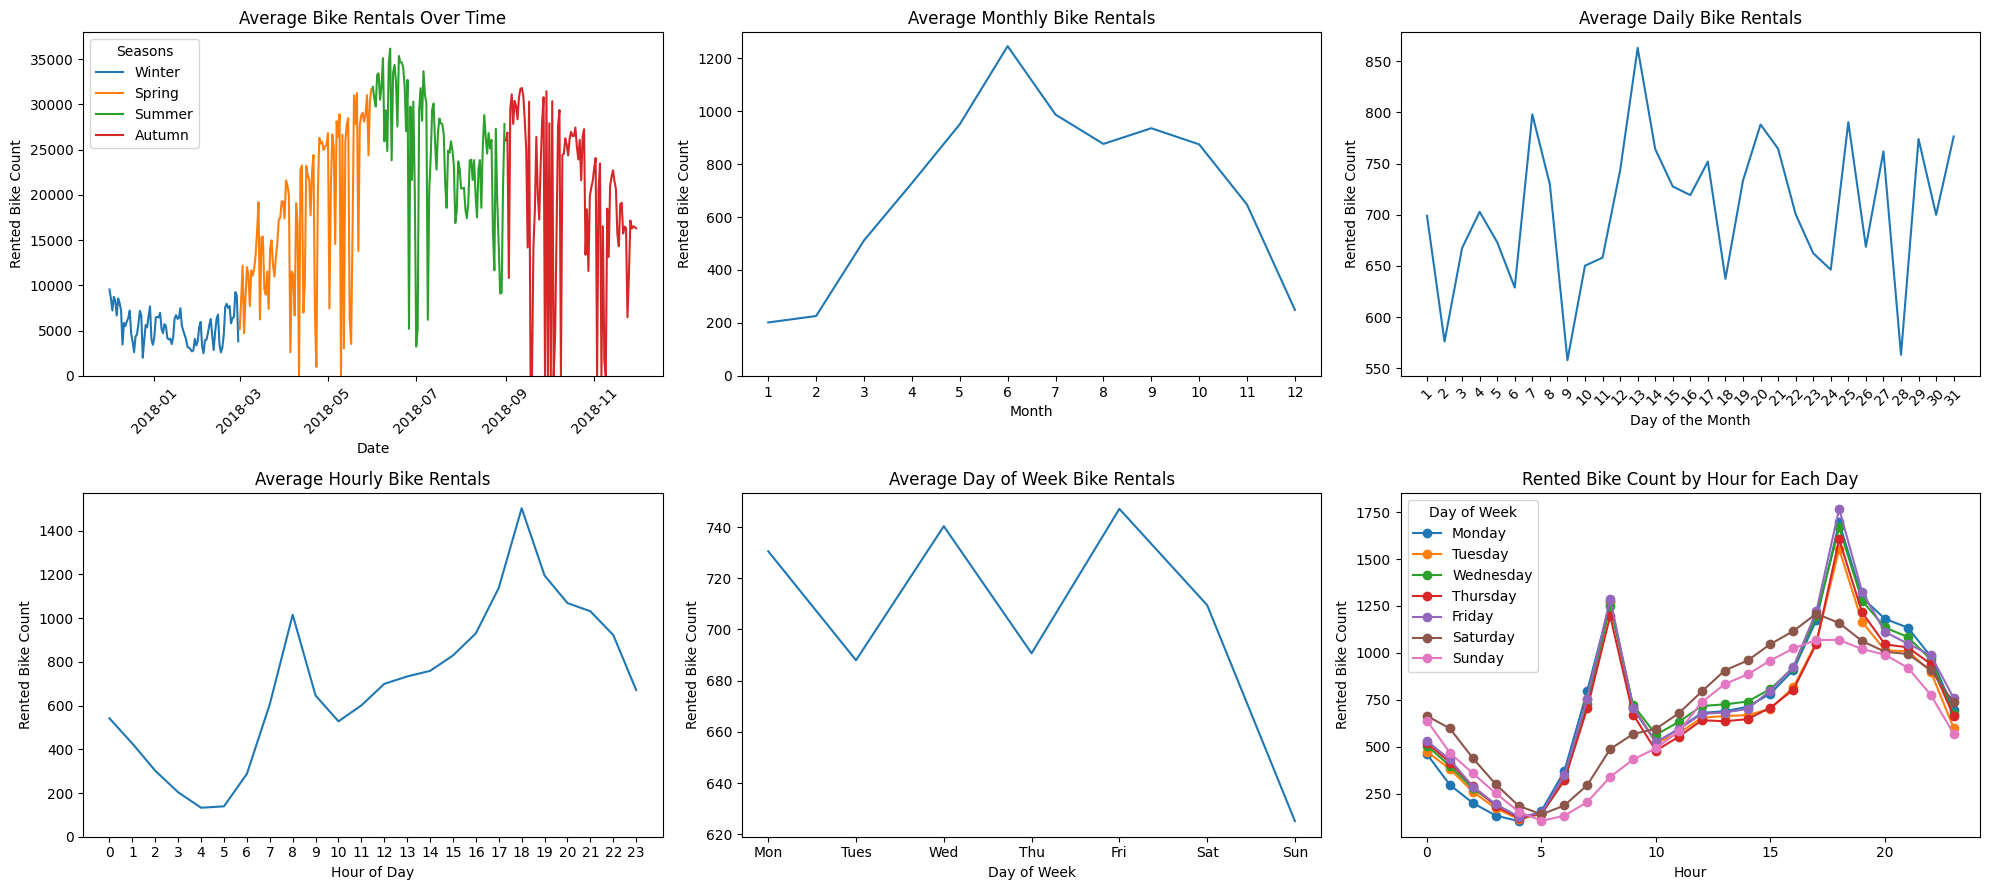

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 9))

#Daily rentals over time, colored by season
daily_rentals_with_season = data.groupby(['Date', 'Seasons'])['Rented Bike Count'].sum().reset_index()
sns.lineplot(ax=axes[0, 0], data=daily_rentals_with_season, x='Date', y='Rented Bike Count', hue='Seasons', palette='tab10')
axes[0, 0].set(title='Average Bike Rentals Over Time', xlabel='Date', ylabel='Rented Bike Count')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].set_ylim(0)

#Average monthly rentals
monthly_rentals = data.groupby('Month')['Rented Bike Count'].mean()
sns.lineplot(ax=axes[0, 1], x=monthly_rentals.index, y=monthly_rentals.values)
axes[0, 1].set(title='Average Monthly Bike Rentals', xlabel='Month', ylabel='Rented Bike Count')
axes[0, 1].set_xticks(range(1, 13))
axes[0, 1].set_ylim(0)

#Average daily rentals by day of the month
daily_rentals = data.groupby('Day')['Rented Bike Count'].mean()
sns.lineplot(ax=axes[0, 2], x=daily_rentals.index, y=daily_rentals.values)
axes[0, 2].set(title='Average Daily Bike Rentals', xlabel='Day of the Month', ylabel='Rented Bike Count')
axes[0, 2].set_xticks(range(1, 32))
axes[0, 2].tick_params(axis='x', rotation=45)
#axes[0, 2].set_ylim(0)

#Average hourly rentals
hourly_rentals = data.groupby('Hour')['Rented Bike Count'].mean()
sns.lineplot(ax=axes[1, 0], x=hourly_rentals.index, y=hourly_rentals.values)
axes[1, 0].set(title='Average Hourly Bike Rentals', xlabel='Hour of Day', ylabel='Rented Bike Count')
axes[1, 0].set_xticks(range(0, 24))
axes[1, 0].set_ylim(0)

#Average Day of Week rentals
day_name_mapping = {0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
day_of_week_rentals = data.groupby('Day Of Week')['Rented Bike Count'].mean()
day_of_week_rentals.index = day_of_week_rentals.index.map(day_name_mapping)
sns.lineplot(ax=axes[1, 1], x=day_of_week_rentals.index, y=day_of_week_rentals.values)
axes[1, 1].set(title='Average Day of Week Bike Rentals', xlabel='Day of Week', ylabel='Rented Bike Count')
#axes[1, 1].set_ylim(0)

#Rented Bike Count by Hour for Each Day (Monday to Sunday)
# Mapping 'Day Of Week' to day names
data['Day Name'] = data['Day Of Week'].map({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
})
# Ensure that the days are plotted in order from Monday to Sunday
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for day_name in day_order:
    day_data = data[data['Day Name'] == day_name]
    hourly_mean = day_data.groupby('Hour')['Rented Bike Count'].mean()
    axes[1, 2].plot(hourly_mean.index, hourly_mean, marker='o', label=day_name)
axes[1, 2].set(title='Rented Bike Count by Hour for Each Day', xlabel='Hour', ylabel='Rented Bike Count')
axes[1, 2].legend(title='Day of Week')
data = data.drop(columns='Day Name')

plt.tight_layout()
plt.show()


*KEY OBSERVATIONS*

* There is a pattern with rentals rising as the weather warms up and falling as it gets colder, with noticeable dip during Winter.
* Zero bike rental days were only observed during Spring and Autumn
* There is a clear pattern in bike rentals peaking around 8am and 6pm which corresponds to typical commuting hours
* There is a drop in bike rentals during early morning and late night hours
* Bike rentals seem to be at it's peak during June
* There are some fluctuation in bike rentals across different days of the month, but there doesn't appear to be a strong, clear pattern.
* Rentals seem to drop on Sunday, and the 8 am and 6 pm peak is not noticed during weekends.
* These Datetime based features seem to affect the target feature

In [20]:
#Dropping the Date and datetime Column
data = data.drop(columns = 'Date')
data.reset_index(drop=True, inplace=True)

#Make the Target feature as the last column
dependent_column = data.pop('Rented Bike Count')
data['Rented Bike Count'] = dependent_column

#Modifying the Time series feature list
time_series_features = ['Month','Day','Hour','Day Of Week']

In [21]:
data.head()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Month,Day,Hour,Day Of Week,Rented Bike Count
0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,12,1,0,4,254
1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,12,1,1,4,204
2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,12,1,2,4,173
3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,12,1,3,4,107
4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,12,1,4,4,78


## OUTLIER DETECTION

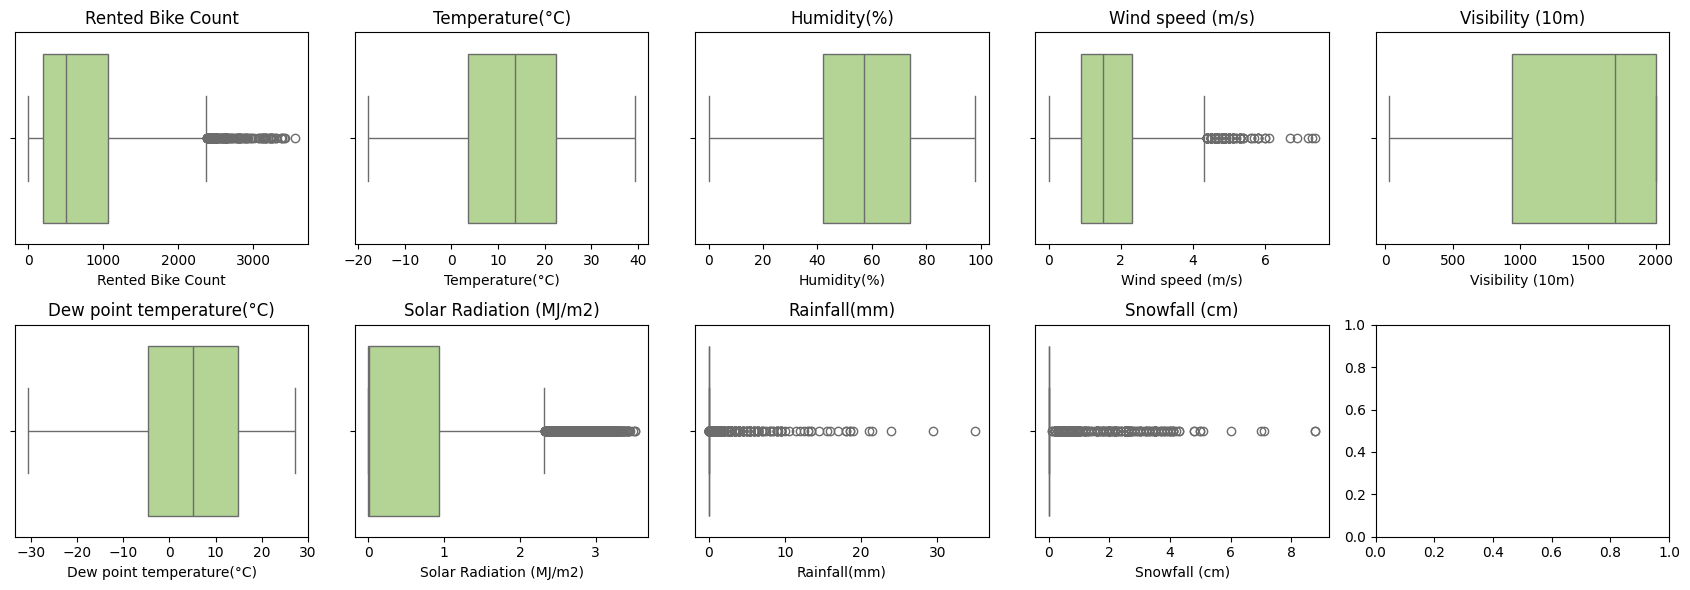

In [22]:
# Initialize the figure
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(17, 6))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate through numerical features and plot histogram and boxplot
for i, feature in enumerate(numerical_target_features):
    sns.boxplot(x=data[feature], ax=axes[i], color = '#B2DF8A')
    axes[i].set_title(f'{feature}')

plt.tight_layout()
plt.show()

In [23]:
outlier_features = ['Rented Bike Count', 'Wind speed (m/s)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

data_outlier_handled = data

for feature in outlier_features:
    Q1 = data_outlier_handled[feature].quantile(0.25)
    Q3 = data_outlier_handled[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((data_outlier_handled[feature] < lower_bound) | (data_outlier_handled[feature] > upper_bound)).sum()
    print(f'{feature} Outliers: {outliers}')
    data_outlier_handled = data_outlier_handled[(data_outlier_handled[feature] >= lower_bound) & (data_outlier_handled[feature] <= upper_bound)]
print(f'Outliers that will be removed if we use IQR on all the above features: {round(((data.shape[0]-data_outlier_handled.shape[0])/data.shape[0])*100,2)}%')

Rented Bike Count Outliers: 158
Wind speed (m/s) Outliers: 161
Solar Radiation (MJ/m2) Outliers: 681
Rainfall(mm) Outliers: 512
Snowfall (cm) Outliers: 398
Outliers that will be removed if we use IQR on all the above features: 21.8%


In [24]:
#Check outliers only on the target feature

data_outlier_handled = data

Q1 = data_outlier_handled[target_feature].quantile(0.25).values[0]
Q3 = data_outlier_handled[target_feature].quantile(0.75).values[0]
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data_outlier_handled[(data_outlier_handled[target_feature[0]] < lower_bound) |
                                (data_outlier_handled[target_feature[0]] > upper_bound)]
outlier_count = len(outliers)
print(f'{target_feature[0]} Outliers: {outlier_count}')

# Filter out the outliers from the dataset
data_outlier_handled = data_outlier_handled[(data_outlier_handled[target_feature[0]] >= lower_bound) &
                                            (data_outlier_handled[target_feature[0]] <= upper_bound)]
percentage_removed = round(((data.shape[0] - data_outlier_handled.shape[0]) / data.shape[0]) * 100, 2)
print(f'Outliers that will be removed if we use IQR only on the Target feature: {percentage_removed}%')

Rented Bike Count Outliers: 158
Outliers that will be removed if we use IQR only on the Target feature: 1.8%


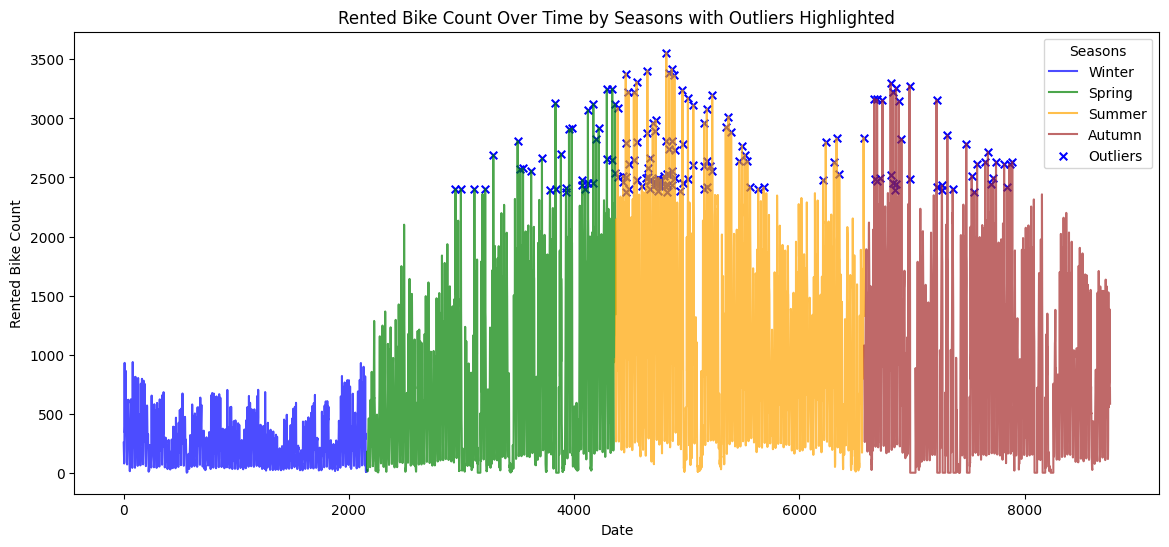

In [25]:
# Assuming 'data' also has a 'Date' column and 'Season' column as in the previous analysis
season_colors = {'Winter': 'blue', 'Spring': 'green', 'Summer': 'orange', 'Autumn': 'brown'}

# Plot the time series with colors based on seasons and highlight the identified outliers
plt.figure(figsize=(14, 6))
for season, color in season_colors.items():
    season_data = data[data['Seasons'] == season]
    plt.plot(season_data.index, season_data[target_feature[0]], label=season, color=color, alpha = 0.7)

# Highlight the outliers on the plot
plt.scatter(outliers.index, outliers[target_feature[0]], color='blue', label='Outliers', s=30, marker='x')

plt.title(f'{target_feature[0]} Over Time by Seasons with Outliers Highlighted')
plt.xlabel('Date')
plt.ylabel(target_feature[0])
plt.legend(title='Seasons')
plt.show()

*THOUGHT PROCESS*
* If I try to remove all outliers outside the IQR on the features containing outliers, it is removing almost 22% of the dataset which I'm not comfortable with
* In Seoul, the following is rare:
-- Wind Speed - above 15 m/s
-- Solar Radiation - above 25 MJ/m²
-- Rainfall (mm) - exceeding 100 mm
-- Snowfall(cm) - more than 10 cm

The dataset values fall well within this range, so I'm choosing to keep the outliers on these features.
* If I remove the outliers only in the Target Feature, only 1.8% of the data will be removed. But when the outliers are investigated, it looks like there is a seasonal pattern with warmer months having higher bike rentals. So, it doesn't look like an anamoly since there is a pattern, hence I'm choosing to keep the outliers.

## ENCODING FEATURES

In [26]:
#Treating time based features as categorical as it is not a time series data
encode_features = categorical_features.copy()
encode_features.extend(time_series_features)

#Display unique values
for feature in encode_features:
  print(f'{feature}: {data[feature].unique()}')

Seasons: ['Winter' 'Spring' 'Summer' 'Autumn']
Holiday: ['No Holiday' 'Holiday']
Month: [12  1  2  3  4  5  6  7  8  9 10 11]
Day: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Hour: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Day Of Week: [4 5 6 0 1 2 3]


In [27]:
#Generate dummy variables, dropping the most frequent category in each case
data = pd.get_dummies(data, columns = encode_features, drop_first = True)

#Making the dependent column as the last column
dependent_column = data.pop('Rented Bike Count')
data['Rented Bike Count'] = dependent_column
data.head()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,Seasons_Summer,...,Hour_21,Hour_22,Hour_23,Day Of Week_1,Day Of Week_2,Day Of Week_3,Day Of Week_4,Day Of Week_5,Day Of Week_6,Rented Bike Count
0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,False,False,...,False,False,False,False,False,False,True,False,False,254
1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,False,False,...,False,False,False,False,False,False,True,False,False,204
2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,False,False,...,False,False,False,False,False,False,True,False,False,173
3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,False,False,...,False,False,False,False,False,False,True,False,False,107
4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,False,False,...,False,False,False,False,False,False,True,False,False,78


# **TRAINING AND TEST SET CREATION**

## TRAIN TEST SPLIT

In [28]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X, y

(array([[-5.2, 37, 2.2, ..., True, False, False],
        [-5.5, 38, 0.8, ..., True, False, False],
        [-6.0, 39, 1.0, ..., True, False, False],
        ...,
        [2.6, 39, 0.3, ..., True, False, False],
        [2.1, 41, 1.0, ..., True, False, False],
        [1.9, 43, 1.3, ..., True, False, False]], dtype=object),
 array([254, 204, 173, ..., 694, 712, 584]))

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7008, 82), (1752, 82), (7008,), (1752,))

## LINEAR REGRESSION ASSUMPTIONS CHECK - 1

* LINEARITY - The relationship between the independent and dependent variables should be linear.
* NO MULTICOLLINEARITY - Independent variables should not be too highly correlated with each other.
* Rest of the assumptions will be checked after model fitting

In [31]:
# Creating a function to convert X_train/X_test to a dataframe for convenience while checking Linear Regression assumptions.
# This function is only valid if the array has the same numer of columns as data dataframe
def convert_to_dataframe(X_train):
    # Convert X_train back to a DataFrame
    X_train_df = pd.DataFrame(X_train, columns=[data.columns[i] for i in range(X_train.shape[1])])
    return X_train_df

X_train_df = convert_to_dataframe(X_train)

### ***Linearity***


The scatterplot analysis suggests some features (temperature and dew point temperature) have a reasonably linear relationship with the target variable. However, other features like humidity, wind speed, and visibility show weaker or more ambiguous linear trends. Let's confirm if that's the case with the training set as well

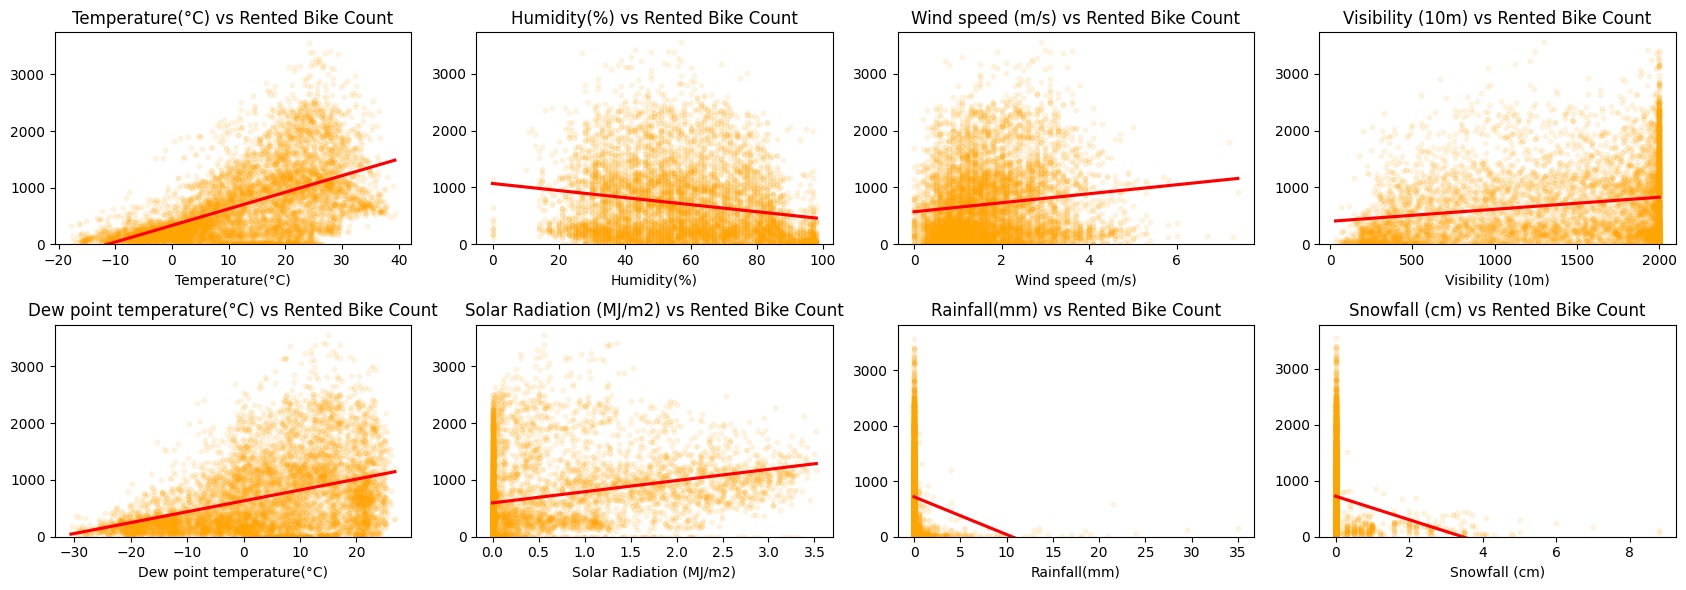

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(17, 6))

axes = axes.flatten()

# Iterate through numerical features and plot scatterplots
for i, feature in enumerate(numerical_features):
  sns.regplot(x=X_train_df[feature].astype(float), y=y_train, ax=axes[i], ci=None,
                line_kws={"color":"red"}, scatter_kws={"color": "orange", "marker": "x", "s": 10, "alpha": 0.1})
  axes[i].set_title(f'{feature} vs {target_feature[0]}')
  axes[i].set_ylim(bottom=0)

plt.tight_layout()
plt.show()

*THOUGHT PROCESS*
* The trend holds true for the training set as well.
* I'm going to hold off on doing any feature transformations until I check the rest of the assumptions

### ***Multicollinearity***


The correlation matrix showed a high correlation between Temperature and Dew. Let's confirm it with Variance Inflation Factor (VIF) on the training data

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

#Create a function to calculate vif so that it can be reused
def calculate_vif(X_train_df, numerical_features):
    # Select only numerical features from X_train_df
    X_train_numerical = X_train_df[numerical_features].apply(pd.to_numeric)

    # Add a constant column for the VIF calculation
    X_train_numerical_with_const = sm.add_constant(X_train_numerical)

    # Calculate VIF for each numerical feature
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X_train_numerical_with_const.columns
    vif_data["VIF"] = [variance_inflation_factor(X_train_numerical_with_const.values, i) for i in range(X_train_numerical_with_const.shape[1])]

    # Remove the VIF for the constant term
    vif_data = vif_data.drop(0).reset_index(drop=True)

    return vif_data

In [34]:
#Check VIF
vif_results = calculate_vif(X_train_df, numerical_features)
vif_results

,Feature,VIF
0,Temperature(°C),88.887514
1,Humidity(%),20.971988
2,Wind speed (m/s),1.206592
3,Visibility (10m),1.576005
4,Dew point temperature(°C),118.170094
5,Solar Radiation (MJ/m2),1.983198
6,Rainfall(mm),1.078470
7,Snowfall (cm),1.094943


*THOUGHT PROCESS*
* Given the high correlation observed in the Correlation matrix between Temperature and Dew, and confirmed by the VIF analysis now, I'm going to remove the Dew column, as it has the highest VIF. A VIF value greater than 5 or 10 typically indicates high multicollinearity.
* Additional reason to remove the Dew column: It also showed a moderate correlation with Humidity unlike Temperature.

In [35]:
#Drop Dew feature and check for VIF
features_to_remove = ['Dew point temperature(°C)']

X_train_df = X_train_df.drop(columns=features_to_remove)
numerical_features = [feature for feature in numerical_features if feature not in features_to_remove]

#Check VIF with reduced features
vif_results = calculate_vif(X_train_df, numerical_features)
vif_results

,Feature,VIF
0,Temperature(°C),1.556478
1,Humidity(%),2.410136
2,Wind speed (m/s),1.203919
3,Visibility (10m),1.560561
4,Solar Radiation (MJ/m2),1.901261
5,Rainfall(mm),1.063541
6,Snowfall (cm),1.089153


*RESULT*
* Removing Dew feature has massively reduced the other features VIF, with the maximum value being around 2.4, indicating there is no noticeable multicollinearity among the current features, thus satisfying the No Multicollinearity assumption.
* So, moving forward, Dew feature won't be considered.

## PROCESS X_TRAIN AND X_TEST

In [36]:
X_train_df.head()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,Seasons_Summer,Seasons_Winter,...,Hour_20,Hour_21,Hour_22,Hour_23,Day Of Week_1,Day Of Week_2,Day Of Week_3,Day Of Week_4,Day Of Week_5,Day Of Week_6
0,8.2,62,0.6,291,1.22,0.0,0.0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,28.4,57,2.4,2000,0.84,0.0,0.0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,29.9,57,1.7,1992,0.88,0.1,0.0,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,14.8,29,0.6,1749,2.2,0.0,0.0,True,False,False,...,False,False,False,False,False,True,False,False,False,False
4,12.2,47,1.1,2000,0.0,0.0,0.0,False,False,False,...,True,False,False,False,False,True,False,False,False,False


In [37]:
#Process X_test. X_train had features removed in the previous step
X_test_df = convert_to_dataframe(X_test)
X_test_df = X_test_df.drop(columns=features_to_remove)

#Convert them back to numpy arrays
X_train=X_train_df.values
X_test=X_test_df.values

In [38]:
X_train.shape, X_test.shape

((7008, 81), (1752, 81))

In [39]:
X_train[0]

array([8.2, 62, 0.6, 291, 1.22, 0.0, 0.0, False, False, True, True, True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       True, False, False, False, False, False, False, False, False,
       False, False, False, True, False, False], dtype=object)

# **FEATURE SCALING**

In [40]:
#Applying scaling only on Numerical features in X_train
#Since X_train is a numpy array, we can access the column only through the indices. So, we need to find the column indices
numerical_indices = X_train_df.columns.get_indexer(numerical_features)

In [41]:
from sklearn.preprocessing import StandardScaler
#Creating a function to scale numerical features to reuse with X_test
def scale_numerical_features(X_train):
    sc = StandardScaler()
    X_numerical_scaled = sc.fit_transform(X_train[:, numerical_indices])

    # Replace the numerical features in X_train with the scaled values
    X_train[:, numerical_indices] = X_numerical_scaled

    return X_train

X_train = scale_numerical_features(X_train)
X_test = scale_numerical_features(X_test)

In [42]:
X_train[0], X_test[0]

(array([-0.38874606033890213, 0.1899601491798979, -1.0816827653497283,
        -1.882041433474724, 0.738812238886852, -0.1271351545890945,
        -0.1726936683166693, False, False, True, True, True, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, True, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, True, False,
        False, False, False, False, False, False, False, False, False,
        False, True, False, False], dtype=object),
 array([-0.19424898562874843, 0.7032574370929282, -0.41405835278272207,
        0.9327965299492239, -0.6555022538655261, -0.1526113373178306,
        -0.16865746101807763, True, False, False, True, False, False,
        False, True, False, 

# **MODEL BUILDING**

##SCORE METRICS INITIALIZATION

**R-Squared**: Measures how well the model explains the variance in the data.

It is a relative measure that tells how much better the model performs compared to a baseline model that predicts the mean value.

**RMSE and MAE**: Provide absolute error measures in the units of the target variable, showing how far off the predictions are from the actual values.

* RMSE is more sensitive to outliers. So, if RMSE is significantly larger than MAE, it suggests that the model's predictions have some large errors or outliers.

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
import time


#Define a function to calculate the score metrics
def cross_val_score_func(model, scoring_metric, X_train, y_train):
  score = cross_val_score(estimator = model, X= X_train, y = y_train, scoring = scoring_metric, cv = 10)
  return score

# Custom MAE and RMSE calculation (manually handle inverse log transformation)
def exp_rmse(y_true, y_pred_log):
    y_pred_original = np.expm1(y_pred_log)  # Reverse log transformation
    return np.sqrt(mean_squared_error(y_true, y_pred_original))

def exp_mae(y_true, y_pred_log):
    y_pred_original = np.expm1(y_pred_log)  # Reverse log transformation
    return mean_absolute_error(y_true, y_pred_original)

# Create a DataFrame to store the model metrics with correct dtypes
metrics_df = pd.DataFrame({
    "Model": pd.Series(dtype="object"),
    "R-Squared": pd.Series(dtype="float"),
    "MAE": pd.Series(dtype="float"),
    "RMSE": pd.Series(dtype="float"),
    "Execution Time (s)": pd.Series(dtype="float")
})

## MODELS

### ***Linear Regression***

In [44]:
from sklearn.linear_model import LinearRegression

# Start the timer
start_time = time.time()

#Fit Model
model = LinearRegression()
model.fit(X_train, y_train)

#Calculate metrics
r2 = cross_val_score_func(model,'r2', X_train, y_train)

##cross_val_score returns negative values for MAE and RMSE error metrics by default
mae = cross_val_score_func(model,'neg_mean_absolute_error', X_train, y_train)
mae = -mae #Negate the results to get positive MAE

rmse = cross_val_score_func(model,'neg_mean_squared_error', X_train, y_train)
rmse = np.sqrt(-rmse)  #Negate and take the square root to get actual RMSE

# End the timer
end_time = time.time()

# Calculate the elapsed time (in seconds)
execution_time = round(end_time - start_time, 3)

# Add a new row with the metrics
new_model_metrics = {
    "Model": model.__class__.__name__,
    "R-Squared": round(r2.mean(),3),
    "MAE": round(mae.mean(),3),
    "RMSE": round(rmse.mean(),3),
    "Execution Time (s)": execution_time
}

# Convert the dictionary to a DataFrame
new_model_metrics_df = pd.DataFrame([new_model_metrics])

# Check if metrics_df is empty
if metrics_df.empty:
    metrics_df = new_model_metrics_df
else:
    # Concatenate the new row to the existing metrics DataFrame
    metrics_df = pd.concat([metrics_df, new_model_metrics_df], ignore_index=True)

# Display the DataFrame
metrics_df

,Model,R-Squared,MAE,RMSE,Execution Time (s)
0,LinearRegression,0.639,289.743,386.105,6.491


### ***Linear Regression Assumptions - Check 2***

In [45]:
# Predict the values for y_train
y_train_pred = model.predict(X_train)

# Calculate residuals
residuals = y_train - y_train_pred

**HOMOSCEDASTICITY** - The variance of the residuals should be constant across all levels of the predicted values

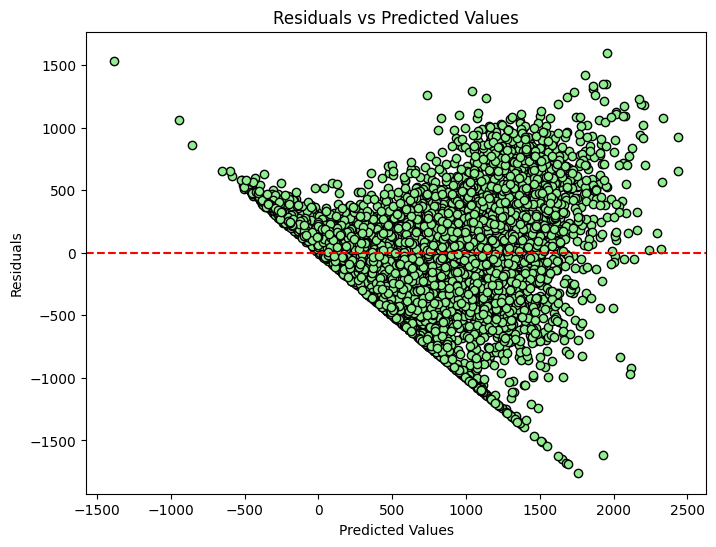

In [46]:
#Using a Residuals vs. Predicted plot
plt.figure(figsize=(8, 6))
plt.scatter(y_train_pred, residuals, color='lightgreen', edgecolor='black')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

The plot shows a violation of the homoscedasticity assumption, as the residuals exhibit increasing variance with larger predicted values, showing a funnel like pattern. To address this we can try a model by using a log transformation on the target feature.

**NORMALITY** - The residuals should follow a normal distribution.

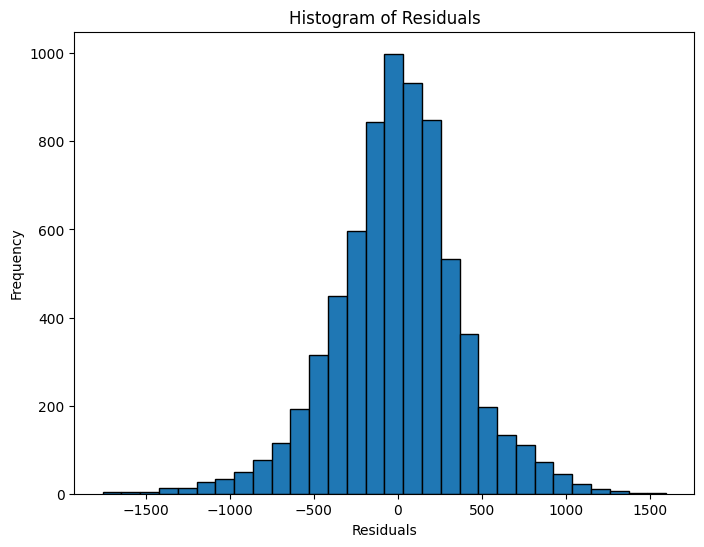

In [47]:
#Using Histogram of Residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

The residuals seem to follow a normal distribution. Even if they don't, this assumption can be relaxed by using Central Limit Theorem.

**INDEPENDENCE OF ERRORS (NO AUTOCORRELATION)** - The residuals should be independent of each other, with no correlation between them

In [48]:
#Using the Durbin-Watson test
durbin_watson_stat = sm.stats.stattools.durbin_watson(residuals)
print (f'Durbin-Watson test for independence :{durbin_watson_stat}')

Durbin-Watson test for independence :1.9679675454326995


The Durbin-Watson statistic of 1.97 indicates that the residuals are approximately independent, satisfying the assumption of no autocorrelation.

The Durbin-Watson statistic ranges from 0 to 4:
* A value of 2 indicates no autocorrelation (the residuals are independent).
* A value less than 2 indicates positive autocorrelation.
* A value greater than 2 indicates negative autocorrelation.

**SUMMARY**

Since only the Homoscedasticity asusmption is violated, let's try Linear Regression again by log transforming the target feature

### ***Linear Regression - Log Transformed Target Feature***

In [49]:
# Start the timer
start_time = time.time()

# Fit model
model = LinearRegression()
model.fit(X_train, np.log1p(y_train))

# Cross-validation for R2
r2 = cross_val_score_func(model, 'r2', X_train, np.log1p(y_train))

# Custom cross-validation for MAE and RMSE
y_train_pred_log = cross_val_predict(model, X_train, np.log1p(y_train), cv=10)
mae = exp_mae(y_train, y_train_pred_log)
rmse = exp_rmse(y_train, y_train_pred_log)

# End the timer
end_time = time.time()
execution_time = round(end_time - start_time, 3)

# Add a new row with the metrics
new_model_metrics = {
    "Model": model.__class__.__name__ + ' - Log Transformation',
    "R-Squared": round(r2.mean(), 3),
    "MAE": round(mae, 3),
    "RMSE": round(rmse, 3),
    "Execution Time (s)": execution_time
}

# Convert the dictionary to a DataFrame
new_model_metrics_df = pd.DataFrame([new_model_metrics])

# Check if metrics_df is empty
if metrics_df.empty:
    metrics_df = new_model_metrics_df
else:
    # Concatenate the new row to the existing metrics DataFrame
    metrics_df = pd.concat([metrics_df, new_model_metrics_df], ignore_index=True)

# Display the DataFrame
metrics_df


,Model,R-Squared,MAE,RMSE,Execution Time (s)
0,LinearRegression,0.639,289.743,386.105,6.491
1,LinearRegression - Log Transformation,0.381,328.138,492.011,4.044


### ***Random Forest Regression***

In [50]:
from sklearn.ensemble import RandomForestRegressor

# Start the timer
start_time = time.time()

#Fit Model
model = RandomForestRegressor()
model.fit(X_train, y_train)

#Calculate metrics
r2 = cross_val_score_func(model,'r2', X_train, y_train)

##cross_val_score returns negative values for MAE and RMSE error metrics by default
mae = cross_val_score_func(model,'neg_mean_absolute_error', X_train, y_train)
mae = -mae #Negate the results to get positive MAE

rmse = cross_val_score_func(model,'neg_mean_squared_error', X_train, y_train)
rmse = np.sqrt(-rmse)  #Negate and take the square root to get actual RMSE

# End the timer
end_time = time.time()

# Calculate the elapsed time (in seconds)
execution_time = round(end_time - start_time, 3)

# Add a new row with the metrics
new_model_metrics = {
    "Model": model.__class__.__name__,
    "R-Squared": round(r2.mean(),3),
    "MAE": round(mae.mean(),3),
    "RMSE": round(rmse.mean(),3),
    "Execution Time (s)": execution_time
}

# Convert the dictionary to a DataFrame
new_model_metrics_df = pd.DataFrame([new_model_metrics])

# Check if metrics_df is empty
if metrics_df.empty:
    metrics_df = new_model_metrics_df
else:
    # Concatenate the new row to the existing metrics DataFrame
    metrics_df = pd.concat([metrics_df, new_model_metrics_df], ignore_index=True)

# Display the DataFrame
metrics_df

,Model,R-Squared,MAE,RMSE,Execution Time (s)
0,LinearRegression,0.639,289.743,386.105,6.491
1,LinearRegression - Log Transformation,0.381,328.138,492.011,4.044
2,RandomForestRegressor,0.832,150.172,264.243,240.311


### ***Random Forest Regression - Log Transformed Target Feature***

In [51]:
# Start the timer
start_time = time.time()

# Fit model
model = RandomForestRegressor()
model.fit(X_train, np.log1p(y_train))

# Cross-validation for R2
r2 = cross_val_score_func(model, 'r2', X_train, np.log1p(y_train))

# Custom cross-validation for MAE and RMSE
y_train_pred_log = cross_val_predict(model, X_train, np.log1p(y_train), cv=10)
mae = exp_mae(y_train, y_train_pred_log)
rmse = exp_rmse(y_train, y_train_pred_log)

# End the timer
end_time = time.time()
execution_time = round(end_time - start_time, 3)

# Add a new row with the metrics
new_model_metrics = {
    "Model": model.__class__.__name__ + ' - Log Transformation',
    "R-Squared": round(r2.mean(), 3),
    "MAE": round(mae, 3),
    "RMSE": round(rmse, 3),
    "Execution Time (s)": execution_time
}

# Convert the dictionary to a DataFrame
new_model_metrics_df = pd.DataFrame([new_model_metrics])

# Check if metrics_df is empty
if metrics_df.empty:
    metrics_df = new_model_metrics_df
else:
    # Concatenate the new row to the existing metrics DataFrame
    metrics_df = pd.concat([metrics_df, new_model_metrics_df], ignore_index=True)

# Display the DataFrame
metrics_df


,Model,R-Squared,MAE,RMSE,Execution Time (s)
0,LinearRegression,0.639,289.743,386.105,6.491
1,LinearRegression - Log Transformation,0.381,328.138,492.011,4.044
2,RandomForestRegressor,0.832,150.172,264.243,240.311
3,RandomForestRegressor - Log Transformation,0.886,139.344,234.790,175.701


### ***Support Vector Machine***

In [52]:
from sklearn.svm import SVR

# Start the timer
start_time = time.time()

#Fit Model
model = SVR()
model.fit(X_train, y_train)

#Calculate metrics
r2 = cross_val_score_func(model,'r2', X_train, y_train)

##cross_val_score returns negative values for MAE and RMSE error metrics by default
mae = cross_val_score_func(model,'neg_mean_absolute_error', X_train, y_train)
mae = -mae #Negate the results to get positive MAE

rmse = cross_val_score_func(model,'neg_mean_squared_error', X_train, y_train)
rmse = np.sqrt(-rmse)  #Negate and take the square root to get actual RMSE

# End the timer
end_time = time.time()

# Calculate the elapsed time (in seconds)
execution_time = round(end_time - start_time, 3)

# Add a new row with the metrics
new_model_metrics = {
    "Model": model.__class__.__name__,
    "R-Squared": round(r2.mean(),3),
    "MAE": round(mae.mean(),3),
    "RMSE": round(rmse.mean(),3),
    "Execution Time (s)": execution_time
}

# Convert the dictionary to a DataFrame
new_model_metrics_df = pd.DataFrame([new_model_metrics])

# Check if metrics_df is empty
if metrics_df.empty:
    metrics_df = new_model_metrics_df
else:
    # Concatenate the new row to the existing metrics DataFrame
    metrics_df = pd.concat([metrics_df, new_model_metrics_df], ignore_index=True)

# Display the DataFrame
metrics_df

,Model,R-Squared,MAE,RMSE,Execution Time (s)
0,LinearRegression,0.639,289.743,386.105,6.491
1,LinearRegression - Log Transformation,0.381,328.138,492.011,4.044
2,RandomForestRegressor,0.832,150.172,264.243,240.311
3,RandomForestRegressor - Log Transformation,0.886,139.344,234.790,175.701
4,SVR,0.168,408.792,587.077,103.746


### ***Support Vector Machine - Log Transformed Target Feature***

In [53]:
# Start the timer
start_time = time.time()

# Fit model
model = SVR()
model.fit(X_train, np.log1p(y_train))

# Cross-validation for R2
r2 = cross_val_score_func(model, 'r2', X_train, np.log1p(y_train))

# Custom cross-validation for MAE and RMSE
y_train_pred_log = cross_val_predict(model, X_train, np.log1p(y_train), cv=10)
mae = exp_mae(y_train, y_train_pred_log)
rmse = exp_rmse(y_train, y_train_pred_log)

# End the timer
end_time = time.time()
execution_time = round(end_time - start_time, 3)

# Add a new row with the metrics
new_model_metrics = {
    "Model": model.__class__.__name__ + ' - Log Transformation',
    "R-Squared": round(r2.mean(), 3),
    "MAE": round(mae, 3),
    "RMSE": round(rmse, 3),
    "Execution Time (s)": execution_time
}

# Convert the dictionary to a DataFrame
new_model_metrics_df = pd.DataFrame([new_model_metrics])

# Check if metrics_df is empty
if metrics_df.empty:
    metrics_df = new_model_metrics_df
else:
    # Concatenate the new row to the existing metrics DataFrame
    metrics_df = pd.concat([metrics_df, new_model_metrics_df], ignore_index=True)

# Display the DataFrame
metrics_df


,Model,R-Squared,MAE,RMSE,Execution Time (s)
0,LinearRegression,0.639,289.743,386.105,6.491
1,LinearRegression - Log Transformation,0.381,328.138,492.011,4.044
2,RandomForestRegressor,0.832,150.172,264.243,240.311
3,RandomForestRegressor - Log Transformation,0.886,139.344,234.790,175.701
4,SVR,0.168,408.792,587.077,103.746
5,SVR - Log Transformation,0.513,118.493,198.157,57.070


### ***XGBoost***

In [54]:
import xgboost as xgb

# Start the timer
start_time = time.time()

#Fit Model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

#Calculate metrics
r2 = cross_val_score_func(model,'r2', X_train, y_train)

##cross_val_score returns negative values for MAE and RMSE error metrics by default
mae = cross_val_score_func(model,'neg_mean_absolute_error', X_train, y_train)
mae = -mae #Negate the results to get positive MAE

rmse = cross_val_score_func(model,'neg_mean_squared_error', X_train, y_train)
rmse = np.sqrt(-rmse)  #Negate and take the square root to get actual RMSE

# End the timer
end_time = time.time()

# Calculate the elapsed time (in seconds)
execution_time = round(end_time - start_time, 3)

# Add a new row with the metrics
new_model_metrics = {
    "Model": model.__class__.__name__,
    "R-Squared": round(r2.mean(),3),
    "MAE": round(mae.mean(),3),
    "RMSE": round(rmse.mean(),3),
    "Execution Time (s)": execution_time
}

# Convert the dictionary to a DataFrame
new_model_metrics_df = pd.DataFrame([new_model_metrics])

# Check if metrics_df is empty
if metrics_df.empty:
    metrics_df = new_model_metrics_df
else:
    # Concatenate the new row to the existing metrics DataFrame
    metrics_df = pd.concat([metrics_df, new_model_metrics_df], ignore_index=True)

# Display the DataFrame
metrics_df

,Model,R-Squared,MAE,RMSE,Execution Time (s)
0,LinearRegression,0.639,289.743,386.105,6.491
1,LinearRegression - Log Transformation,0.381,328.138,492.011,4.044
2,RandomForestRegressor,0.832,150.172,264.243,240.311
3,RandomForestRegressor - Log Transformation,0.886,139.344,234.790,175.701
4,SVR,0.168,408.792,587.077,103.746
5,SVR - Log Transformation,0.513,118.493,198.157,57.070
6,XGBRegressor,0.900,129.694,203.052,11.676


### ***XGBoost - Log Transformed Target Feature***

In [55]:
# Start the timer
start_time = time.time()

# Fit model
model = xgb.XGBRegressor()
model.fit(X_train, np.log1p(y_train))

# Cross-validation for R2
r2 = cross_val_score_func(model, 'r2', X_train, np.log1p(y_train))

# Custom cross-validation for MAE and RMSE
y_train_pred_log = cross_val_predict(model, X_train, np.log1p(y_train), cv=10)
mae = exp_mae(y_train, y_train_pred_log)
rmse = exp_rmse(y_train, y_train_pred_log)

# End the timer
end_time = time.time()
execution_time = round(end_time - start_time, 3)

# Add a new row with the metrics
new_model_metrics = {
    "Model": model.__class__.__name__ + ' - Log Transformation',
    "R-Squared": round(r2.mean(), 3),
    "MAE": round(mae, 3),
    "RMSE": round(rmse, 3),
    "Execution Time (s)": execution_time
}

# Convert the dictionary to a DataFrame
new_model_metrics_df = pd.DataFrame([new_model_metrics])

# Check if metrics_df is empty
if metrics_df.empty:
    metrics_df = new_model_metrics_df
else:
    # Concatenate the new row to the existing metrics DataFrame
    metrics_df = pd.concat([metrics_df, new_model_metrics_df], ignore_index=True)

# Display the DataFrame
metrics_df


,Model,R-Squared,MAE,RMSE,Execution Time (s)
0,LinearRegression,0.639,289.743,386.105,6.491
1,LinearRegression - Log Transformation,0.381,328.138,492.011,4.044
2,RandomForestRegressor,0.832,150.172,264.243,240.311
3,RandomForestRegressor - Log Transformation,0.886,139.344,234.790,175.701
4,SVR,0.168,408.792,587.077,103.746
5,SVR - Log Transformation,0.513,118.493,198.157,57.070
6,XGBRegressor,0.900,129.694,203.052,11.676
7,XGBRegressor - Log Transformation,0.916,126.339,217.094,9.256


### ***Light GBM***

In [56]:
import lightgbm as lgb

# Start the timer
start_time = time.time()

#Fit Model
model = lgb.LGBMRegressor(verbosity=-1)
model.fit(X_train, y_train)

#Calculate metrics
r2 = cross_val_score_func(model,'r2', X_train, y_train)

##cross_val_score returns negative values for MAE and RMSE error metrics by default
mae = cross_val_score_func(model,'neg_mean_absolute_error', X_train, y_train)
mae = -mae #Negate the results to get positive MAE

rmse = cross_val_score_func(model,'neg_mean_squared_error', X_train, y_train)
rmse = np.sqrt(-rmse)  #Negate and take the square root to get actual RMSE

# End the timer
end_time = time.time()

# Calculate the elapsed time (in seconds)
execution_time = round(end_time - start_time, 3)

# Add a new row with the metrics
new_model_metrics = {
    "Model": model.__class__.__name__,
    "R-Squared": round(r2.mean(),3),
    "MAE": round(mae.mean(),3),
    "RMSE": round(rmse.mean(),3),
    "Execution Time (s)": execution_time
}

# Convert the dictionary to a DataFrame
new_model_metrics_df = pd.DataFrame([new_model_metrics])

# Check if metrics_df is empty
if metrics_df.empty:
    metrics_df = new_model_metrics_df
else:
    # Concatenate the new row to the existing metrics DataFrame
    metrics_df = pd.concat([metrics_df, new_model_metrics_df], ignore_index=True)

# Display the DataFrame
metrics_df

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


,Model,R-Squared,MAE,RMSE,Execution Time (s)
0,LinearRegression,0.639,289.743,386.105,6.491
1,LinearRegression - Log Transformation,0.381,328.138,492.011,4.044
2,RandomForestRegressor,0.832,150.172,264.243,240.311
3,RandomForestRegressor - Log Transformation,0.886,139.344,234.790,175.701
4,SVR,0.168,408.792,587.077,103.746
5,SVR - Log Transformation,0.513,118.493,198.157,57.070
6,XGBRegressor,0.900,129.694,203.052,11.676
7,XGBRegressor - Log Transformation,0.916,126.339,217.094,9.256
8,LGBMRegressor,0.877,138.628,225.044,6.688


### ***Light GBM - Log Transformed Target Feature***

In [57]:
# Start the timer
start_time = time.time()

# Fit model
model = lgb.LGBMRegressor(verbosity=-1)
model.fit(X_train, np.log1p(y_train))

# Cross-validation for R2
r2 = cross_val_score_func(model, 'r2', X_train, np.log1p(y_train))

# Custom cross-validation for MAE and RMSE
y_train_pred_log = cross_val_predict(model, X_train, np.log1p(y_train), cv=10)
mae = exp_mae(y_train, y_train_pred_log)
rmse = exp_rmse(y_train, y_train_pred_log)

# End the timer
end_time = time.time()
execution_time = round(end_time - start_time, 3)

# Add a new row with the metrics
new_model_metrics = {
    "Model": model.__class__.__name__ + ' - Log Transformation',
    "R-Squared": round(r2.mean(), 3),
    "MAE": round(mae, 3),
    "RMSE": round(rmse, 3),
    "Execution Time (s)": execution_time
}

# Convert the dictionary to a DataFrame
new_model_metrics_df = pd.DataFrame([new_model_metrics])

# Check if metrics_df is empty
if metrics_df.empty:
    metrics_df = new_model_metrics_df
else:
    # Concatenate the new row to the existing metrics DataFrame
    metrics_df = pd.concat([metrics_df, new_model_metrics_df], ignore_index=True)

# Display the DataFrame
metrics_df


,Model,R-Squared,MAE,RMSE,Execution Time (s)
0,LinearRegression,0.639,289.743,386.105,6.491
1,LinearRegression - Log Transformation,0.381,328.138,492.011,4.044
2,RandomForestRegressor,0.832,150.172,264.243,240.311
3,RandomForestRegressor - Log Transformation,0.886,139.344,234.790,175.701
4,SVR,0.168,408.792,587.077,103.746
5,SVR - Log Transformation,0.513,118.493,198.157,57.070
6,XGBRegressor,0.900,129.694,203.052,11.676
7,XGBRegressor - Log Transformation,0.916,126.339,217.094,9.256
8,LGBMRegressor,0.877,138.628,225.044,6.688
9,LGBMRegressor - Log Transformation,0.822,176.690,299.081,4.082


### ***Model Results***

In [58]:
metrics_df

,Model,R-Squared,MAE,RMSE,Execution Time (s)
0,LinearRegression,0.639,289.743,386.105,6.491
1,LinearRegression - Log Transformation,0.381,328.138,492.011,4.044
2,RandomForestRegressor,0.832,150.172,264.243,240.311
3,RandomForestRegressor - Log Transformation,0.886,139.344,234.790,175.701
4,SVR,0.168,408.792,587.077,103.746
5,SVR - Log Transformation,0.513,118.493,198.157,57.070
6,XGBRegressor,0.900,129.694,203.052,11.676
7,XGBRegressor - Log Transformation,0.916,126.339,217.094,9.256
8,LGBMRegressor,0.877,138.628,225.044,6.688
9,LGBMRegressor - Log Transformation,0.822,176.690,299.081,4.082


## TEST SET PREDICTION

In [59]:
#Predict X_test using the best performing model - XGBoost on a Log transformed target feature
model = xgb.XGBRegressor()
model.fit(X_train, np.log1p(y_train))
y_pred_log = model.predict(X_test)  # Predicted values are in log scale
y_pred = np.expm1(y_pred_log)  # Convert back to original scale

# **MODEL EVALUATION**

## PREDICTION METRICS

In [60]:
# Now calculate the metrics using the original y_test and the transformed predictions
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Test results prediction metrics:")
print("R-Squared: {:.3f}".format(r2))
print("MAE: {:.3f}".format(mae))
print("RMSE: {:.3f}".format(rmse))

Test results prediction metrics:
R-Squared: 0.878
MAE: 130.069
RMSE: 225.639


## HYPERTUNING - GRID SEARCH

In [61]:
from sklearn.model_selection import GridSearchCV

# Initialize XGBoost model
model = xgb.XGBRegressor()

# Define parameter grid
parameters = {
    'n_estimators': [100, 200, 300],          #Number of trees in the ensemble (boosting rounds). Higher values generally improve accuracy but increase training time.
    'max_depth': [3, 4, 5],                   #Maximum depth of a tree. Controls model complexity. Higher values allow the model to capture more patterns but may lead to overfitting.
    'learning_rate': [0.01, 0.1, 0.2],        #Step size reduction during each boosting round. Smaller values reduce each tree's influence, often requiring more trees to converge.
    'subsample': [0.8, 1.0],                  #Fraction of samples to be used for fitting each tree. Helps prevent overfitting by introducing randomness. A value of 1.0 means using all samples.
    'colsample_bytree': [0.8, 1.0]            #Fraction of features to be used for each tree. Similar to 'subsample', but applied to features instead of data rows.
}

# Set up the grid search
grid_search = GridSearchCV(estimator=model,
                           param_grid=parameters,
                           scoring='r2',
                           cv=10,
                           verbose=1, #Controls the level of output during the grid search. verbose=1: shows basic progress messages
                           n_jobs=-1) #Number of CPU cores to use for parallel computation. n_jobs=-1 utilizes all available cores for faster computation.

# Fit the grid search
#grid_search.fit(X_train, y_train)
grid_search.fit(X_train, np.log1p(y_train))

# Print the best parameters and best score
print("\nBest parameters found: ", grid_search.best_params_)
print("Best R2 score: ", grid_search.best_score_)


Fitting 10 folds for each of 108 candidates, totalling 1080 fits

Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
Best R2 score:  0.9384538701566439


## HYPERTUNED METRICS

In [62]:
# Use the best model to predict on the test set
best_model = grid_search.best_estimator_
y_pred_log = best_model.predict(X_test)  # Predicted values are in log scale
y_pred = np.expm1(y_pred_log)  # Convert back to original scale

# Evaluate the performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Hypertuned Test results prediction metrics:")
print("R-Squared: {:.3f}".format(r2))
print("MAE: {:.3f}".format(mae))
print("RMSE: {:.3f}".format(rmse))

Hypertuned Test results prediction metrics:
R-Squared: 0.903
MAE: 115.901
RMSE: 201.506


### ***Test Prediction Vizualized***

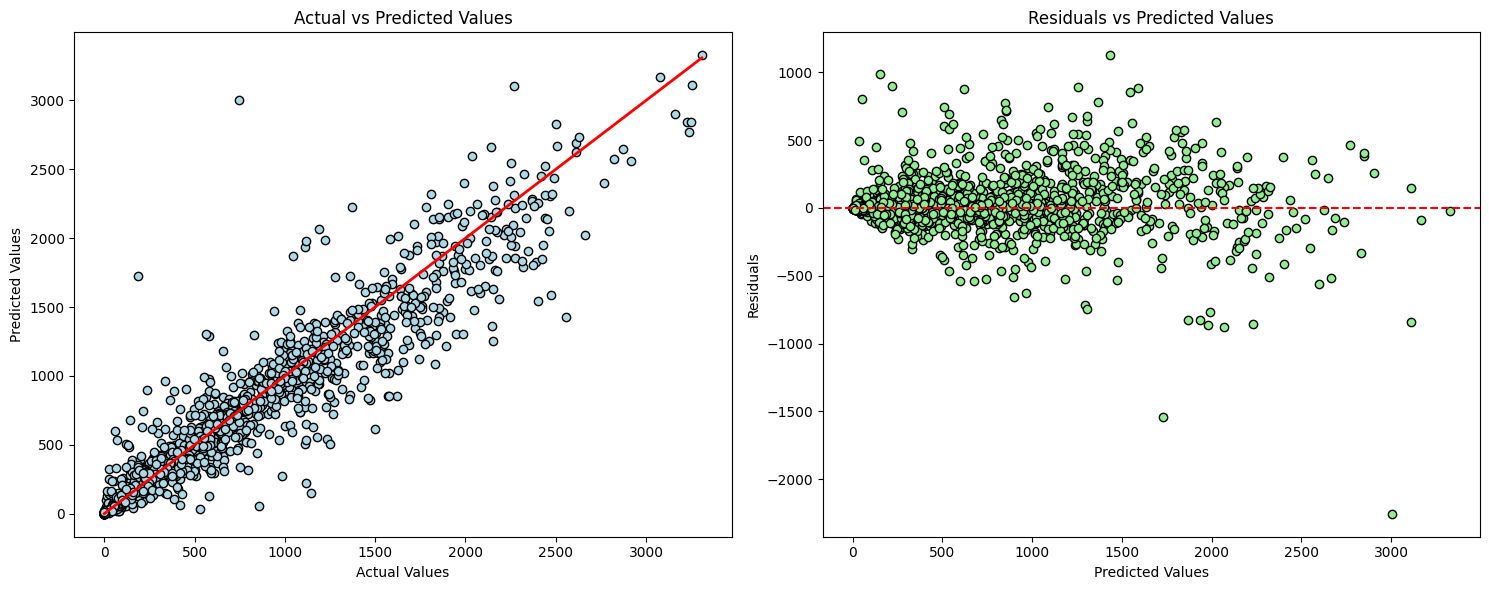

In [63]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

#Actual vs Predicted Values
axes[0].scatter(y_test, y_pred, color='lightblue', edgecolor='black')
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].set_title('Actual vs Predicted Values')

#Residuals vs Predicted Values
residuals = y_test - y_pred
axes[1].scatter(y_pred, residuals, color='lightgreen', edgecolor='black')
axes[1].axhline(y=0, color='red', linestyle='--')
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals vs Predicted Values')

plt.tight_layout()
plt.show()

## FEATURE IMPORTANCE

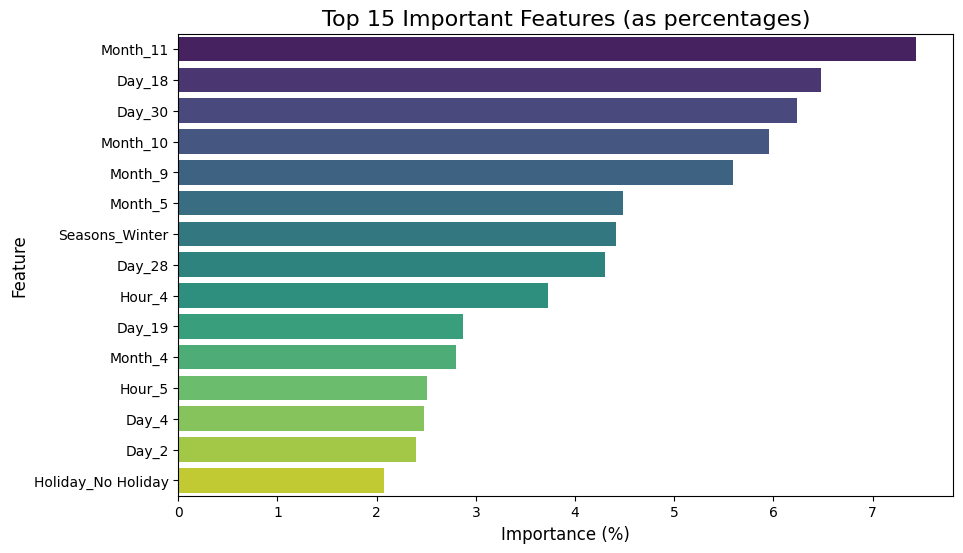

In [64]:
#Get feature importance scores from the trained model
feature_importances = best_model.feature_importances_

#Convert feature importance scores to percentages
feature_importances_percent = 100 * (feature_importances / np.sum(feature_importances))

#Create a DataFrame for better visualization (assuming you have the feature names from X_train)
features = X_train_df.columns  #We have this data frame from the Multicollinearity step under the Train and Test set creation
importance_df = pd.DataFrame({'Feature': features, 'Importance (%)': feature_importances_percent})

#Sort the DataFrame and get the top 15 features
top_15_importance_df = importance_df.sort_values(by='Importance (%)', ascending=False).head(15)

#Plot the top 15 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance (%)', y='Feature', data=top_15_importance_df, hue='Feature', palette="viridis", legend=False)
plt.title('Top 15 Important Features (as percentages)', fontsize=16)
plt.xlabel('Importance (%)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

# **SUMMARY**

* A hypertuned XGBoost model on a log transformed target feature seem to have performed the best out of all models tested with a R-squared of 90.3% on a true test set. This indicates that 90.3% of the variance in the target variable is explained by the model, suggesting a good fit overall.

* The Actual vs Predicted Values plot shows that most of the predictions are well aligned with the actual values, as evidenced by the clustering of points around the red diagonal line. The model captures the general trend well but has room for improvement in predicting extreme values.

* The Residuals vs Predicted Values plot shows a somewhat random scatter of residuals compared to a previous funnel pattern noticed during Homoscedasticity testing. Most of the values are centered around zero, indicating that the model does not have significantly over or under estimate the predictions causing a bias.